# Bellman Equation Implementation


1. **Bellman Equation and Value Iteration**
   - Implementation in a grid world environment
   - Visualization of value function
   - Policy iteration and optimization



## Part 1: Bellman Equation and Value Iteration

The Bellman equation is fundamental in reinforcement learning:

$V(s) = \max_a \sum_{s'} P(s'|s,a)[R(s,a,s') + \gamma V(s')]$

where:
- $V(s)$ is the value of state $s$
- $a$ is an action
- $s'$ is the next state
- $P(s'|s,a)$ is the transition probability
- $R(s,a,s')$ is the reward
- $\gamma$ is the discount factor

We'll implement this in a simple grid world environment.

In [7]:
class GridWorld:
    def __init__(self, size: int = 5):
        """Initialize grid world environment."""
        self.size = size
        self.actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # right, down, left, up
        self.gamma = 0.9  # discount factor
        
        # Create grid with rewards
        self.grid = np.zeros((size, size))
        self.grid[size-1, size-1] = 1.0  # goal state
        self.grid[size-2, size-1] = -1.0  # penalty state
        
    def is_valid_state(self, state: Tuple[int, int]) -> bool:
        """Check if state is valid."""
        x, y = state
        return 0 <= x < self.size and 0 <= y < self.size
    
    def get_next_state(self, state: Tuple[int, int], action: Tuple[int, int]) -> Tuple[int, int]:
        """Get next state given current state and action."""
        x, y = state
        dx, dy = action
        next_x, next_y = x + dx, y + dy
        
        if self.is_valid_state((next_x, next_y)):
            return (next_x, next_y)
        return (x, y)  # stay in current state if move is invalid
    
    def get_reward(self, state: Tuple[int, int]) -> float:
        """Get reward for current state."""
        x, y = state
        return self.grid[x, y]
    
    def value_iteration(self, n_iterations: int = 100) -> Tuple[np.ndarray, List[np.ndarray]]:
        """Implement value iteration using Bellman equation."""
        # Initialize value function
        V = np.zeros((self.size, self.size))
        V_history = [V.copy()]
        
        for _ in range(n_iterations):
            V_new = np.zeros_like(V)
            
            # Update each state
            for i in range(self.size):
                for j in range(self.size):
                    if self.grid[i, j] != 0:  # terminal states
                        V_new[i, j] = self.grid[i, j]
                        continue
                    
                    # Find maximum value over all actions
                    values = []
                    for action in self.actions:
                        next_state = self.get_next_state((i, j), action)
                        reward = self.get_reward(next_state)
                        values.append(reward + self.gamma * V[next_state])
                    
                    V_new[i, j] = max(values)
            
            V = V_new
            V_history.append(V.copy())
        
        return V, V_history

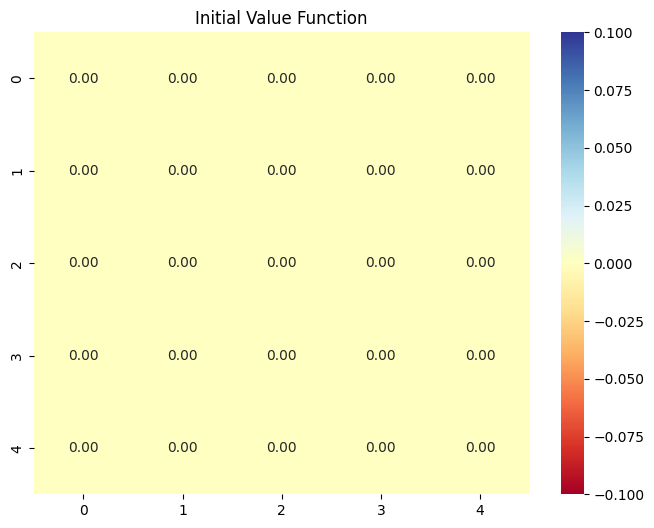

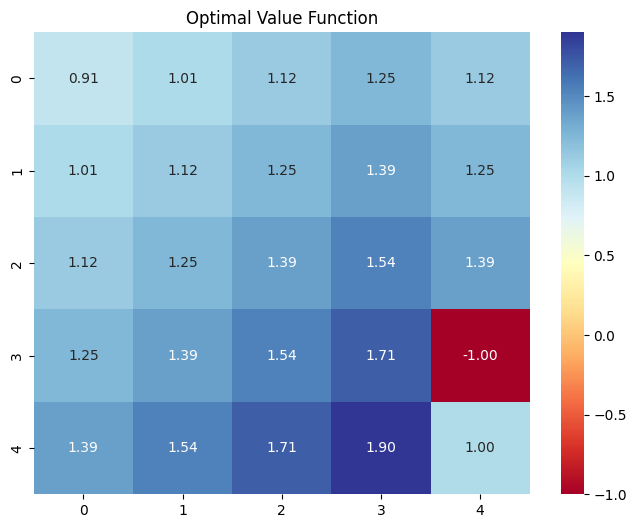

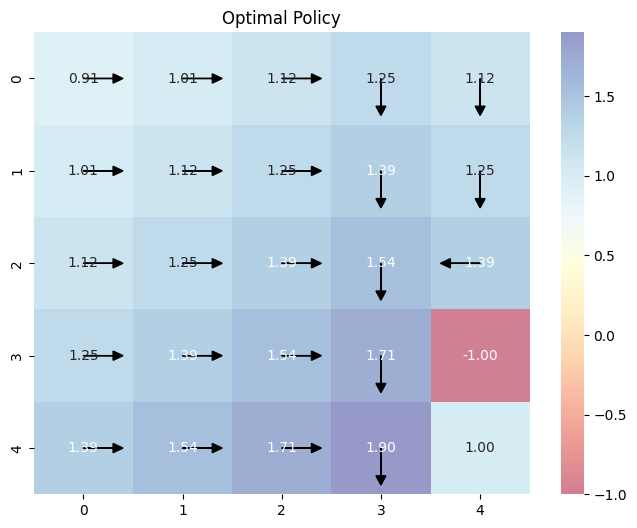

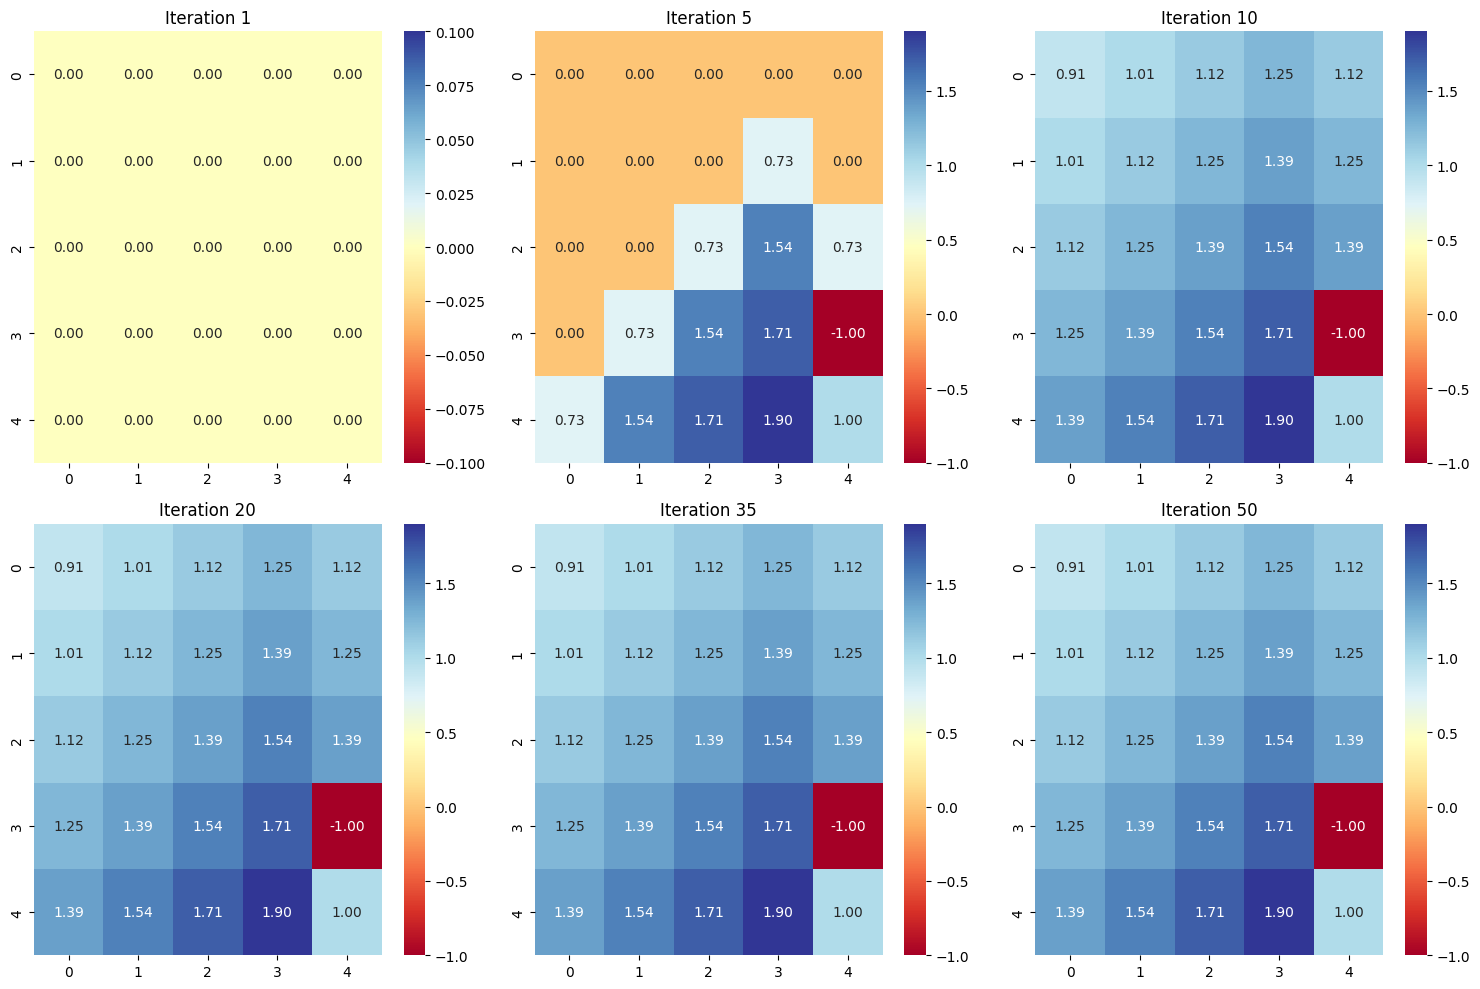

In [8]:
# Create and solve grid world
env = GridWorld(size=5)
optimal_values, value_history = env.value_iteration(n_iterations=50)

# Visualization functions
def plot_value_function(values: np.ndarray, title: str):
    """Plot value function as a heatmap."""
    plt.figure(figsize=(8, 6))
    sns.heatmap(values, annot=True, fmt='.2f', cmap='RdYlBu')
    plt.title(title)
    plt.show()

def plot_policy_arrows(values: np.ndarray):
    """Plot optimal policy using arrows."""
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot value function heatmap
    sns.heatmap(values, annot=True, fmt='.2f', cmap='RdYlBu', alpha=0.5, ax=ax)
    
    # Plot arrows for optimal actions
    for i in range(env.size):
        for j in range(env.size):
            if env.grid[i, j] != 0:  # skip terminal states
                continue
                
            # Find optimal action
            best_value = float('-inf')
            best_action = None
            
            for action in env.actions:
                next_state = env.get_next_state((i, j), action)
                value = values[next_state]
                if value > best_value:
                    best_value = value
                    best_action = action
            
            # Plot arrow
            if best_action:
                dx, dy = best_action
                ax.arrow(j + 0.5, i + 0.5, dy * 0.3, dx * 0.3,
                        head_width=0.1, head_length=0.1, fc='k', ec='k')
    
    plt.title("Optimal Policy")
    plt.show()

# Plot initial value function
plot_value_function(value_history[0], "Initial Value Function")

# Plot final value function
plot_value_function(optimal_values, "Optimal Value Function")

# Plot optimal policy
plot_policy_arrows(optimal_values)

# Plot value function evolution
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
plot_iterations = [0, 4, 9, 19, 34, 49]  # Plot specific iterations

for idx, iter_num in enumerate(plot_iterations):
    i, j = idx // 3, idx % 3
    sns.heatmap(value_history[iter_num], annot=True, fmt='.2f', 
                cmap='RdYlBu', ax=axes[i, j])
    axes[i, j].set_title(f'Iteration {iter_num + 1}')

plt.tight_layout()
plt.show()

## Understanding the Results



### Bellman Equation and Value Iteration
1. The value function shows the expected future rewards from each state
2. Brighter colors indicate higher values (closer to the goal)
3. The arrows show the optimal policy (best action in each state)
4. The evolution plots show how the value function converges

### Tips for Modification
Try experimenting with:
1. Different number of Gaussian components for EM
2. Different grid world sizes and reward structures
3. Different discount factors (γ) for value iteration
4. Adding obstacles or different rewards in the grid world